Yet another 10,000 foot view @ [`https://github.com/squillero/10k`](https://github.com/squillero/10k)  
Copyright **©** 2022 Giovanni Squillero `<squillero@polito.it>`  
Free for personal or classroom use; see the [license](https://github.com/squillero/10k/blob/main/LICENSE.md) for details.  

------------------------------------------------------------

# Neural Networks (part 3)

In [1]:
import numpy as np
from scipy.optimize import minimize
import sympy
import matplotlib.pyplot as plt

In [2]:
sympy.init_printing(forecolor="black")

## Create a not-so-easy dataset

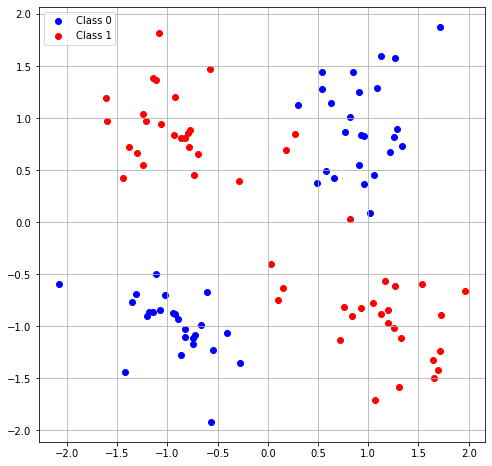

In [3]:
POINTS = 100
SCALE = 0.4
class0 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, -1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, 1],
        ]
    ),
    decimals=2,
)
class1 = np.around(
    np.concatenate(
        [
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [-1, 1],
            np.random.normal(loc=1, scale=SCALE, size=(POINTS // 4, 2)) * [1, -1],
        ]
    ),
    decimals=2,
)
plt.figure(figsize=(8, 8))
plt.scatter(x=class0[:, 0], y=class0[:, 1], c="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], c="red", label="Class 1")
plt.legend()
plt.grid()
x1_min, x1_max = plt.xlim()
x2_min, x2_max = plt.ylim()

## Activation & Variables

In [4]:
def sigmoid(x):
    return 1 / (1 + sympy.exp(-x))

In [5]:
X1, X2 = sympy.symbols("x_1 x_2")
W = (w for w in sympy.symbols(" ".join([f"w_{t}" for t in range(999)])))

## Neural Network 1

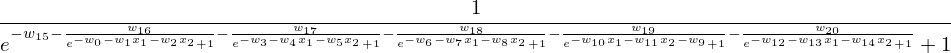

In [6]:
hidden = list()
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))
hidden.append(sigmoid(next(W) + X1 * next(W) + X2 * next(W)))

nn = next(W)
for p in hidden:
    nn += next(W) * p
nn = sigmoid(nn)
nn

### Define *loss* and optimize parameters

In [7]:
def loss_function(v, e):
    if e == 1:
        return -sympy.log(v)  # nb: log(1) = 0
    else:
        return -sympy.log(1 - v)

In [8]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_0, w_1, w_10, w_11, w_12, w_13, w_14, w_15, w_16, w_17, w_18, w_19, w_2, w_20, w_3, w_4, w_5, w_6, w_7, w_8, w_9]


In [9]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [ 15.34691404  44.83692213 -58.75529304 -47.89171727 113.77692001
  92.55379811 112.082816   -41.19018181 -65.49232214 -63.64834593
 -30.25374683  63.12703654 -33.39004772 124.33874503  10.59125342
 -18.97803743  47.82031201  15.63737836  -9.63467928  21.26924914
  60.37009599]


### Plot NN with fitted parameters

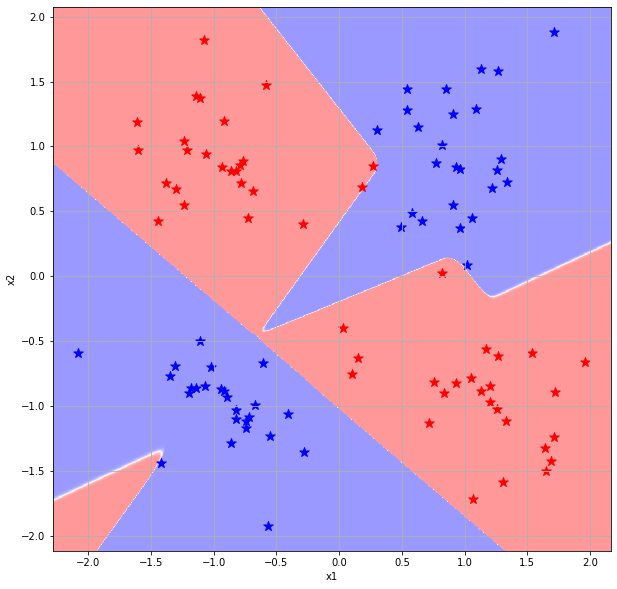

In [10]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")

## Neural Network 2

Just 1 *simple* perceptron, but with extra inputs 

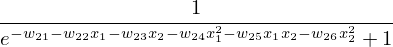

In [11]:
nn = sigmoid(
    next(W) + next(W) * X1 + next(W) * X2 + next(W) * X1 ** 2 + next(W) * X1 * X2 + next(W) * X2 ** 2
)
nn

In [12]:
loss = 0
for x1, x2 in class0:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 0)
for x1, x2 in class1:
    loss = loss + loss_function(nn.subs([(X1, x1), (X2, x2)]), 1)
loss = loss / POINTS
symbols = sorted(list(loss.free_symbols), key=str)
print(f"Symbols: {symbols}")
loss_f = sympy.lambdify(symbols, loss)

Symbols: [w_21, w_22, w_23, w_24, w_25, w_26]


In [13]:
start = np.random.random(len(symbols)) * 2 - 1
fit = minimize(lambda a: loss_f(*a), start, method="BFGS")
print(f"Solution: {fit.x}")

Solution: [ 144.41260512 -119.13365177   42.86892238  -17.06459136 -572.83318785
    9.22910025]


<lambdifygenerated-3>:2: RuntimeWarning: overflow encountered in exp
  return -1/100*log(1 - 1/(exp(-w_21 - 1.71*w_22 - 1.88*w_23 - 2.9241*w_24 - 3.2148*w_25 - 3.5344*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.34*w_22 - 0.73*w_23 - 1.7956*w_24 - 0.9782*w_25 - 0.5329*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.29*w_22 - 0.9*w_23 - 1.6641*w_24 - 1.161*w_25 - 0.81*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.27*w_22 - 1.58*w_23 - 1.6129*w_24 - 2.0066*w_25 - 2.4964*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.26*w_22 - 0.82*w_23 - 1.5876*w_24 - 1.0332*w_25 - 0.6724*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.22*w_22 - 0.68*w_23 - 1.4884*w_24 - 0.8296*w_25 - 0.4624*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.13*w_22 - 1.6*w_23 - 1.2769*w_24 - 1.808*w_25 - 2.56*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.09*w_22 - 1.29*w_23 - 1.1881*w_24 - 1.4061*w_25 - 1.6641*w_26) + 1)) - 1/100*log(1 - 1/(exp(-w_21 - 1.06*w_22 - 0.45*w_23 - 1.1236*w_24 - 0.477*w_25 - 0.2025*w_26) + 1)) - 1/100*log(1 

<lambdifygenerated-4>:2: RuntimeWarning: overflow encountered in exp
  return (1.91603077160529e-63*exp(17.0645913642411*x_1**2 + 572.833187846092*x_1*x_2 + 119.133651766353*x_1 - 9.22910025151215*x_2**2 - 42.8689223761336*x_2) + 1)**(-1.0)


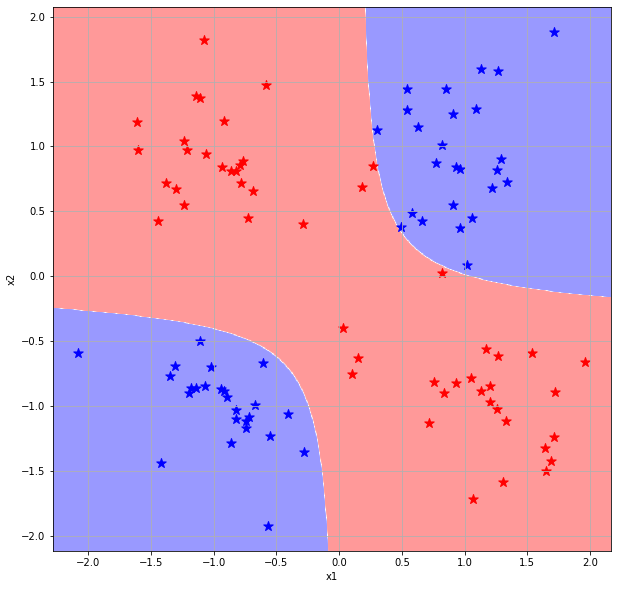

In [14]:
nn_f = sympy.lambdify((X1, X2), nn.subs([(s, v) for s, v in zip(symbols, fit.x)]))

plt.figure(figsize=(10, 10))
x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, 1_000), np.linspace(x2_min, x2_max, 1_000))
plt.pcolormesh(x1, x2, nn_f(x1, x2), cmap="bwr", alpha=0.4, antialiased=True)
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid()
plt.scatter(x=class0[:, 0], y=class0[:, 1], marker="*", s=100, color="blue", label="Class 0")
plt.scatter(x=class1[:, 0], y=class1[:, 1], marker="*", s=100, color="red", label="Class 1")